## Benchmarking 

Sentinel-2 image patches of 7x7 pixels for 10 bands including labels \
\
index files: https://drive.google.com/open?id=14o0eu_UN8RZW68HGR0xHA3es9p_gmuw1 \
training data: https://drive.google.com/open?id=17njNHAyoexj8WmThKfdQzVr18bevGVZ3 \
validation data: https://drive.google.com/open?id=1TtfVv4JomTJW1CKTCX2o4QgUnkoD9iu1 \
testing data: https://drive.google.com/open?id=1RwkC-KitWSeCbLpMhlq7OAlWJgtYx9PS \
\
data format: TFRecord files with featureDict format as defined below, each file containing ca. 20 samples

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import png
import matplotlib.pyplot as plt
#import sklearn

In [2]:
tf.disable_v2_behavior()
try:
    tf.enable_eager_execution()
except Exception:
    pass

Instructions for updating:
non-resource variables are not supported in the long term


### Import and parse TFRecord data

In [129]:
## Define files' paths for TFRecord data

filenames_train = []
filenames_validate = []
filenames_test = []

no_files_train = 3000
no_files_validate = 1000
no_files_test = 1000

no_records_train = 62434
no_records_validate = 21097
no_records_test = 21189

for i in range(no_files_train):
    filenames_train.append("../data/EE_data/EE_data_training/train_patches_"+"{0:04}".format(i)+".tfrecord") 

for i in range(no_files_validate):
    filenames_validate.append("../data/EE_data/EE_data_validation/validate_patches_"+"{0:04}".format(i)+".tfrecord")
    
for i in range(no_files_validate):
    filenames_test.append("../data/EE_data/EE_data_testing/test_patches_"+"{0:04}".format(i)+".tfrecord") 
    
print(len(filenames_train))
print(len(filenames_validate))
print(len(filenames_test))

3000
1000
1000


In [156]:
## Define dictionary with features in TFRecord data

bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
label_names = ['vegetation_elementstree_element_cover_label', \
                'vegetation_elementsshrub_element_cover_label', \
                'vegetation_elementspalm_element_cover_label', \
                'vegetation_elementsbamboo_element_cover_label', \
                'vegetation_elementscrop_element_cover_label', \
                'infrastructure_elementshouse_element_cover_label', \
                'infrastructure_elementsother_buildings_element_cover_label', \
                'infrastructure_elementspaved_road_element_cover_label', \
                'infrastructure_elementsunpaved_road_element_cover_label', \
                'water_bodieslake_water_cover_label', \
                'water_bodiesriver_water_cover_label', \
                'total_water_bodies_cover_label']

featureDict = {}
featureDict['public_id'] = tf.io.FixedLenFeature(shape=[1], dtype=tf.string)
for band in bands:
    featureDict[band] = tf.io.FixedLenFeature(shape=[7,7], dtype=tf.float32,\
                            default_value=tf.zeros([7,7], dtype=tf.float32))
for label_name in label_names:
    featureDict[label_name] = tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
#print(featureDict)

In [144]:
## Import train, validation and test datasets from TFRecord files

dataset_train = tf.data.TFRecordDataset(filenames_train)
dataset_validate = tf.data.TFRecordDataset(filenames_validate)
dataset_test = tf.data.TFRecordDataset(filenames_test)

#for i, raw_record in enumerate(dataset_train.take(1)):
#    example = tf.train.Example()
#    example.ParseFromString(raw_record.numpy())
#    print(i)
#    print(example)

parsedDataset_train = dataset_train.map(lambda example: tf.io.parse_single_example(example, featureDict))
parsedDataset_validate = dataset_validate.map(lambda example: tf.io.parse_single_example(example, featureDict))
parsedDataset_test = dataset_test.map(lambda example: tf.io.parse_single_example(example, featureDict))


#print(parsedDataset_train)
#for i, parsed_record in enumerate(parsedDataset_train.take(1)):
#    print(i)
#    print(repr(parsed_record))

In [251]:
## Export tensorflow dataset into numpy arrays

def _parse_for_export_(serialized_example):
    example = tf.parse_single_example(serialized_example, featureDict)
    d = {}
    for band in bands:
        d[band] = example[band]
        d[band] = tf.reshape(example[band], (49,))
    for label in label_names:
        d[label] = example[label]
        d[label] = tf.cast(example[label], tf.int32)
    d['public_id'] = tf.cast(example['public_id'], tf.string)
    return d

def input_fn_export(filenames = filenames_train):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_for_export_(x))
    return tfrecord_dataset


In [272]:
# Export training data to numpy arrays
dataset_train_for_export = input_fn_export(filenames_train)
numpy_dataset_train = list(dataset_train_for_export.as_numpy_iterator())

#list_of_features_0 = [np.asarray(numpy_dataset_train[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
#x_train = np.concatenate(list_of_features_0,axis = 1)
print(x_train.shape)

#list_of_labels_0 = [np.asarray(numpy_dataset_train[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
#y_train = np.concatenate(list_of_labels_0,axis = 1)
print(y_train.shape)

id_train = np.asarray(numpy_dataset_train[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_train.shape)

for i in range(1, no_records_train):
#for i in range(1, 30):
#    new_row = np.concatenate([np.asarray(numpy_dataset_train[i][band],\
#                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
#    x_train = np.concatenate((x_train, new_row), axis = 0)
#    new_row = np.concatenate([np.asarray(numpy_dataset_train[i][label],\
#                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
#    y_train = np.concatenate((y_train, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_train[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_train = np.concatenate((id_train, new_row), axis = 0)
    
print(x_train.shape)
print(y_train.shape)
print(id_train.shape)


(62434, 490)
(62434, 12)
(1, 1)
(62434, 490)
(62434, 12)
(62434, 1)


In [273]:
# Export validation data to numpy arrays
dataset_validate_for_export = input_fn_export(filenames_validate)
numpy_dataset_validate = list(dataset_validate_for_export.as_numpy_iterator())

#list_of_features_0 = [np.asarray(numpy_dataset_validate[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
#x_validate = np.concatenate(list_of_features_0,axis = 1)
print(x_validate.shape)

#list_of_labels_0 = [np.asarray(numpy_dataset_validate[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
#y_validate = np.concatenate(list_of_labels_0,axis = 1)
print(y_validate.shape)

id_validate = np.asarray(numpy_dataset_validate[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_validate.shape)

for i in range(1, no_records_validate):
#for i in range(1, 30):
#    new_row = np.concatenate([np.asarray(numpy_dataset_validate[i][band],\
#                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
#    x_validate = np.concatenate((x_validate, new_row), axis = 0)
    
#    new_row = np.concatenate([np.asarray(numpy_dataset_validate[i][label],\
#                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
#    y_validate = np.concatenate((y_validate, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_validate[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_validate = np.concatenate((id_validate, new_row), axis = 0)
    
print(x_validate.shape)
print(y_validate.shape)
print(id_validate.shape)


(21097, 490)
(21097, 12)
(1, 1)
(21097, 490)
(21097, 12)
(21097, 1)


In [274]:
# Export test data to numpy arrays
dataset_test_for_export = input_fn_export(filenames_test)
numpy_dataset_test = list(dataset_test_for_export.as_numpy_iterator())

#list_of_features_0 = [np.asarray(numpy_dataset_test[0][band], dtype=np.float32).reshape((1,-1)) for band in bands]
#x_test = np.concatenate(list_of_features_0,axis = 1)
print(x_test.shape)

#list_of_labels_0 = [np.asarray(numpy_dataset_test[0][label], dtype=np.int32).reshape((1,-1)) for label in label_names]
#y_test = np.concatenate(list_of_labels_0,axis = 1)
print(y_test.shape)

id_test = np.asarray(numpy_dataset_test[0]['public_id'], dtype=np.unicode_).reshape((1,-1))
print(id_test.shape)

for i in range(1, no_records_test):
#for i in range(1, 30):
#    new_row = np.concatenate([np.asarray(numpy_dataset_test[i][band],\
#                              dtype=np.float32).reshape((1,-1)) for band in bands], axis = 1)
#    x_test = np.concatenate((x_test, new_row), axis = 0)
#    
#    new_row = np.concatenate([np.asarray(numpy_dataset_test[i][label],\
#                              dtype=np.int32).reshape((1,-1)) for label in label_names], axis = 1)
#    y_test = np.concatenate((y_test, new_row), axis = 0)
    
    new_row = np.asarray(numpy_dataset_test[i]['public_id'], dtype=np.unicode_).reshape((1,-1))
    id_test = np.concatenate((id_test, new_row), axis = 0)
    
print(x_test.shape)
print(y_test.shape)
print(id_test.shape)


(1, 490)
(1, 12)
(1, 1)


KeyboardInterrupt: 

In [280]:
print(id_train)

[['GLU0452795']
 ['GLU0202549']
 ['GLU0471188']
 ...
 ['GLU0340234']
 ['GLU0356918']
 ['GLU0334555']]


In [275]:
## Save data as numpy arrays on disk

np.save('../data/EE_data/x_train.npy', x_train)
np.save('../data/EE_data/y_train.npy', y_train)
np.save('../data/EE_data/id_train.npy', id_train)

np.save('../data/EE_data/x_validate.npy', x_validate)
np.save('../data/EE_data/y_validate.npy', y_validate)
np.save('../data/EE_data/id_validate.npy', id_validate)

#np.save('../data/EE_data/x_test.npy', x_test)
#np.save('../data/EE_data/y_test.npy', y_test)
#np.save('../data/EE_data/id_test.npy', id_test)


In [ ]:
## Parse TFRecord dataset functions for classification pipeline

def _parse_(serialized_example):
    example = tf.parse_single_example(serialized_example, featureDict)
    d = {}
    for band in bands:
        d[band] = example[band]
        #d[band] = tf.reshape(example[band], (49,))
        
    label = tf.cast(example['vegetation_elementstree_element_cover_label'], tf.int32)
    return d, label


# Resampler to balance the training dataset
resampler = tf.data.experimental.rejection_resample(
    class_func, target_dist=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

no_records_train = 62434
no_records_validate = 21097
no_records_test = 21189

def train_input_fn(batch_size=32, no_records = no_records_train):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames_train).take(no_records)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(True).batch(batch_size)
    tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
    return tfrecord_iterator.get_next()

def train_input_fn_2(batch_size=32, no_records = no_records_train, resample = False):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames_train).take(no_records)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(True).batch(batch_size)
    if resample == True:
        tfrecord_dataset = tfrecord_dataset.unbatch().apply(resampler).batch(batch_size)
        #tfrecord_dataset = tfrecord_dataset.map(lambda extra_label, features_and_label: features_and_label)
    return tfrecord_dataset

def validate_input_fn(batch_size=32, no_records = no_records_validate):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames_validate).take(no_records)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(True).batch(batch_size)
    tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
    return tfrecord_iterator.get_next()

def test_input_fn(batch_size=32, no_records = no_records_test):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames_test).take(no_records)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(True).batch(batch_size)
    tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
    return tfrecord_iterator.get_next()



In [ ]:
# Parse TFRecord dataset to compute confusion matrix later

def validate_input_fn_labels(batch_size=32, no_records = no_records_validate):
    tfrecord_dataset = tf.data.TFRecordDataset(filenames_validate).take(no_records)
    tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).batch(batch_size)
    tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
    return tfrecord_iterator.get_next()

def _parse_label_(serialized_example):
    example = tf.parse_single_example(serialized_example, featureDict)
    label = tf.cast(example['vegetation_elementstree_element_cover_label'], tf.int32)
    return label

raw_validation_labels = dataset_validate.map(_parse_label_)

#for i, parsed_record in enumerate(raw_labels.take(10)):
#    print(i)
#    print(repr(parsed_record))

validation_labels = []  
for raw_label in raw_validation_labels:
    raw_label = raw_label.numpy()
    validation_labels = validation_labels + raw_label.tolist()

print(validation_labels)

### Classification

#### tf.estimator.Estimator

In [8]:
feature_columns = []
for band in bands:
    feature_columns.append(tf.feature_column.numeric_column(key=band, shape=(7,7)))
    #feature_columns.append(tf.feature_column.numeric_column(key=band, shape=(49,)))
print(feature_columns)

[NumericColumn(key='B2', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B3', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B4', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B5', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B6', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B7', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B8', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B8A', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B11', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='B12', shape=(7, 7), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [9]:
import tempfile

model_dir = tempfile.mkdtemp()
model = tf.estimator.DNNClassifier(
    [256,32],
    model_dir=model_dir,
    n_classes=10,
    feature_columns=feature_columns,
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmphib1x5oh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
tf.compat.v1.disable_eager_execution()

model.train(lambda:train_input_fn(32,100,True))

ValueError: in converted code:

    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/data/experimental/ops/resampling.py:178 update_estimate_and_tile
        array_ops.expand_dims(dist, 0), [dist_estimation_batch_size, 1])
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_array_ops.py:10411 tile
        "Tile", input=input, multiples=multiples, name=name)
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:742 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:3322 _create_op_internal
        op_def=op_def)
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1786 __init__
        control_input_ops)
    /Users/rotti/.conda/envs/ee/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1622 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 3 but is rank 2 for 'Tile' (op: 'Tile') with input shapes: [1,1,10], [2].


In [11]:
result = model.evaluate(lambda:validate_input_fn(32,100))

for key, value in result.items():
    print(key, ":", value)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-15T08:35:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmphib1x5oh/model.ckpt-4
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.59132s
INFO:tensorflow:Finished evaluation at 2020-04-15-08:35:46
INFO:tensorflow:Saving dict for global step 4: accuracy = 0.43, average_loss = 2.3914309, global_step = 4, loss = 59.785774
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4: /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmphib1x5oh/model.ckpt-4
accuracy : 0.43
average_loss : 2.3914309
loss : 59.785774
global_step : 4


In [12]:
for pred in model.predict(lambda:validate_input_fn(32,100)):
    for key, value in pred.items():
        print(key, ":", value)
    break

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmphib1x5oh/model.ckpt-4
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
logits : [-0.5866188   0.58666635 -0.4337511  -0.47269294  0.68251884  2.2297738
  0.32045525 -0.448139   -0.285868    2.8130026 ]
probabilities : [0.01620171 0.05237357 0.01887776 0.01815676 0.05764218 0.27083492
 0.04013268 0.0186081  0.02188645 0.48528594]
class_ids : [9]
classes : [b'9']
all_class_ids : [0 1 2 3 4 5 6 7 8 9]
all_classes : [b'0' b'1' b'2' b'3' b'4' b'5' b'6' b'7' b'8' b'9']


In [13]:
import tempfile
tf.compat.v1.disable_eager_execution()

no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 50000, 60000]
accuracies = []
confusion_matrices = []

for no_samples in no_samples_array:
    model_dir = tempfile.mkdtemp()
    model = tf.estimator.DNNClassifier(
        [256,32],
        model_dir=model_dir,
        n_classes=10,
        feature_columns=feature_columns,
    )
    model.train(lambda:train_input_fn(32,no_samples))
    result = model.evaluate(lambda:validate_input_fn(32,100))
    for key, value in result.items():
        print(key, ":", value)
    accuracies.append(result['accuracy'])
    for pred in model.predict(lambda:validate_input_fn(32,100)):
        for key, value in pred.items():
            print(key, ":", value)
        break
    


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpzsojrht3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


accuracy : 0.43
average_loss : 1.397043
loss : 34.926075
global_step : 10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpgm6t2o4r/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
logits : [ 3.9503834  -0.70422584 -1.2165333  -2.1668704  -2.3301308  -2.9304123
 -1.0742302  -0.8646345  -0.26395583  3.8505278 ]
probabilities : [0.51157296 0.00486896 0.00291705 0.00112776 0.00095789 0.00052555
 0.00336315 0.00414736 0.00756212 0.46295717]
class_ids : [0]
classes : [b'0']
all_class_ids : [0 1 2 3 4 5 6 7 8 9]
all_classes : [b'0' b'1' b'2' b'3' b'4' b'5' b'6' b'7' b'8' b'9']
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpxwdzxqw1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_

INFO:tensorflow:Loss for final step: 37.794704.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-15T08:36:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp2haeckof/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.49891s
INFO:tensorflow:Finished evaluation at 2020-04-15-08:36:14
INFO:tensorflow:Saving dict for global step 19: accuracy = 0.67, average_loss = 1.3059692, global_step = 19, loss = 32.64923
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19: /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp2haeckof/model.ckpt-19
accuracy : 0.67
average_loss : 1.3059692
loss : 32.64923
global_step : 19
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring pa

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp34thhpj2/model.ckpt.
INFO:tensorflow:loss = 73.54076, step = 1
INFO:tensorflow:Saving checkpoints for 29 into /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp34thhpj2/model.ckpt.
INFO:tensorflow:Loss for final step: 9.339104.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-15T08:36:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp34thhpj2/model.ckpt-29
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.45557s
INFO:tensorflow:Finishe

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpz58gcbri/model.ckpt.
INFO:tensorflow:loss = 73.029106, step = 1
INFO:tensorflow:global_step/sec: 94.6522
INFO:tensorflow:loss = 30.320961, step = 101 (1.058 sec)
INFO:tensorflow:Saving checkpoints for 157 into /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpz58gcbri/model.ckpt.
INFO:tensorflow:Loss for final step: 6.380632.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-15T08:36:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpz58gcbri/model.ckpt-157
INFO:tensorflow:Running local_init_op.
INFO:ten

accuracy : 0.77
average_loss : 0.951124
loss : 23.778101
global_step : 625
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpzmn92db0/model.ckpt-625
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
logits : [ 1.3085629  -0.25141612 -0.7394431  -1.0347878  -1.3300099  -1.0913024
 -1.4111291  -1.1404884  -0.847273    1.0955732 ]
probabilities : [0.37403136 0.07859914 0.04824699 0.03590904 0.02672948 0.03393594
 0.02464681 0.03230714 0.04331521 0.30227888]
class_ids : [0]
classes : [b'0']
all_class_ids : [0 1 2 3 4 5 6 7 8 9]
all_classes : [b'0' b'1' b'2' b'3' b'4' b'5' b'6' b'7' b'8' b'9']
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp7te64r3v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoint

INFO:tensorflow:loss = 31.099277, step = 1701 (1.223 sec)
INFO:tensorflow:global_step/sec: 82.1057
INFO:tensorflow:loss = 23.547497, step = 1801 (1.217 sec)
INFO:tensorflow:Saving checkpoints for 1875 into /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpvdsb9m3s/model.ckpt.
INFO:tensorflow:Loss for final step: 35.111504.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-15T08:37:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpvdsb9m3s/model.ckpt-1875
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51597s
INFO:tensorflow:Finished evaluation at 2020-04-15-08:37:39
INFO:tensorflow:Saving dict for global step 1875: accuracy = 0.77, average_loss = 0.93333846, global_step = 1875, loss = 23.333462
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1875

In [14]:
print('DNN Classifier')
print(no_samples_array)
print(accuracies)

DNN Classifier
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 50000, 60000]
[0.43, 0.43, 0.43, 0.43, 0.43, 0.67, 0.76, 0.73, 0.69, 0.75, 0.43, 0.77, 0.77, 0.77, 0.79, 0.77]


Tensor("Cast:0", shape=(1,), dtype=int32)


TypeError: Failed to convert object of type <class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'> to Tensor. Contents: <DatasetV1Adapter shapes: (1,), types: tf.int32>. Consider casting elements to a supported type.

In [22]:
raw_predictions = model.predict(lambda:validate_input_fn_labels(32,no_records_validate))
predictions = [p['class_ids'][0] for p in raw_predictions]
con_mat = tf.math.confusion_matrix(validation_labels, predictions)
print(con_mat)
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(con_mat,feed_dict=None, session=None))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmpvdsb9m3s/model.ckpt-1875
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Tensor("confusion_matrix_1/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)
Confusion Matrix: 

 [[7797    0    0    0    0    0    0    0    0  939]
 [ 601    0    0    0    0    0    0    0    0  152]
 [ 394    0    0    0    0    0    0    0    0   94]
 [ 230    0    0    0    0    0    0    0    0   93]
 [ 251    0    0    0    0    0    0    0    0  111]
 [ 171    0    0    0    0    0    0    0    0  107]
 [ 170    0    0    0    0    0    0    0    0  110]
 [ 169    0    0    0    0    0    0    0    0  147]
 [ 290    0    0    0    0    0    0    0    0  317]
 [1649    0    0    0    0    0    0    0    0 7305]]


#### benchmarking - sklearn

In [182]:
## Benchmark classification of Sentinel-2 data using sklearn RandomForestClassifier

# Load libraries
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import ElasticNetCV
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler


# Normalize data
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train_tr = scaler.transform(x_train)
#x_validate_tr = scaler.transform(x_validate)

# Make scorer
#acc_score=make_scorer(accuracy_score)

# Train/fit the model and predict results for different numbers of samples
#no_samples_array = [100, 200, 300]
no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 60000]
accuracies = []
confusion_matrices = []

clf = RandomForestClassifier(random_state=0, n_estimators=1000, bootstrap=False, class_weight='balanced')

for no_samples in no_samples_array:
    print("# of training samples: ", no_samples)
    
    #val_no_samples = min(int(no_samples/3), no_records_validate)
    val_no_samples = no_records_validate
    print("# of validation samples: ", val_no_samples)
    
    clf.fit(x_train[:no_samples, :],y_train[:no_samples,0]) #first column of y: tree cover label
    y_pred = clf.predict(x_validate[:val_no_samples,:])

    # evaluate accuracy
    acc = clf.score(x_validate[:val_no_samples,:], y_validate[:val_no_samples,0])
    accuracies.append(acc)
    print("Accuracy score: ", acc)
    
    conf_mat = confusion_matrix(y_validate[:val_no_samples,0], y_pred)
    confusion_matrices.append(conf_mat)
    print("Confusion matrix: \n", conf_mat)

# of training samples:  100
# of validation samples:  21097
Accuracy score:  0.6755936863061098
Confusion matrix: 
 [[6981  101   16  126    1   20   41  232    1 1217]
 [ 499    6    2   11    0    4   11   18    0  202]
 [ 319    3    1    7    0    4    5    8    0  141]
 [ 179    2    0    2    0    2    7    7    0  124]
 [ 187    2    0    6    0    2    4    9    0  152]
 [ 121    4    0    4    0    1    2    3    0  143]
 [ 121    5    0    4    0    0    1    4    0  145]
 [ 109    3    0    7    0    0    4    5    0  188]
 [ 214    8    0    6    1    2    7    7    0  362]
 [1372  115    3  134    0    5   43   25    1 7256]]
# of training samples:  200
# of validation samples:  21097
Accuracy score:  0.7153623737972223
Confusion matrix: 
 [[7297   27    8    0    0   12   12    7    0 1373]
 [ 511    2    1    0    0    2    2    1    0  234]
 [ 332    3    0    0    0    3    2    0    0  148]
 [ 190    1    0    0    0    1    3    0    0  128]
 [ 194    0    0    0    

Accuracy score:  0.735744418637721
Confusion matrix: 
 [[7567    0    0    1    0    0    1    0    0 1167]
 [ 549    0    0    0    0    0    0    0    0  204]
 [ 354    0    0    0    1    0    0    0    0  133]
 [ 211    0    0    0    0    0    0    0    0  112]
 [ 214    0    0    0    0    0    0    0    0  148]
 [ 134    0    0    0    0    0    0    0    0  144]
 [ 131    0    0    0    0    0    0    0    0  149]
 [ 116    0    0    0    0    0    0    1    0  199]
 [ 213    0    0    0    0    1    0    0    0  393]
 [ 997    0    1    0    0    1    0    1    0 7954]]
# of training samples:  50000
# of validation samples:  21097


KeyboardInterrupt: 

In [183]:
print(accuracies)

[0.6755936863061098, 0.7153623737972223, 0.7161207754657061, 0.7172109778641513, 0.7125657676446888, 0.714461771815898, 0.7162629757785467, 0.7195335829738826, 0.7209555861022894, 0.7184433805754372, 0.7270227994501588, 0.7341802151964735, 0.7346068161349955, 0.735744418637721]


In [276]:
## Benchmark classification of Sentinel-2 data using sklearn RandomForestClassifier
## with preprocessing of data

no_pixels = 7*7
no_channels = 10

# Preprocess data by reordering pixels in all 10 channels to the order of green+blue channel pixels
# by value, i.e. "greenest+bluest" pixel first, "least green+blue" last

# Training data
x_train_r = np.zeros(x_train.shape)

#for i in range(x_train.shape[0]):
for i in range(300):
    # Find order of indices by of the green channel by value
    g = x_train[i, bands.index('B3')*no_pixels : (bands.index('B3')+1)*(no_pixels)] #green channel = B3
    b = x_train[i, bands.index('B2')*no_pixels : (bands.index('B2')+1)*(no_pixels)] #blue channel = B2
    gb = np.add(g,b)
    sorted_indices = np.argsort(gb)
    for j in range(no_channels):
        for k in range(no_pixels):
            x_train_r[i,(j*no_pixels)+k] = x_train[i,(j*no_pixels)+sorted_indices[k]]
            
# Validation data
x_validate_r = np.zeros(x_validate.shape)

#for i in range(x_validate.shape[0]):
for i in range(300):
    # Find order of indices by of the green channel by value
    g = x_validate[i, bands.index('B3')*no_pixels : (bands.index('B3')+1)*(no_pixels)] #green channel = B3
    b = x_train[i, bands.index('B2')*no_pixels : (bands.index('B2')+1)*(no_pixels)] #blue channel = B2
    gb = np.add(g,b)
    sorted_indices = np.argsort(gb)
    for j in range(no_channels):
        for k in range(no_pixels):
            x_validate_r[i,j*no_pixels + k] = x_validate[i,j*no_pixels + sorted_indices[k]]


ID : ['GLU0340923']
Tree cover label : 0
All cover labels : [0 0 0 0 0 0 0 0 0 0 0 0]


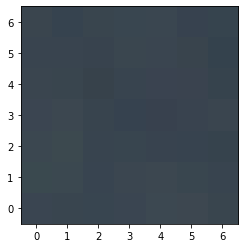

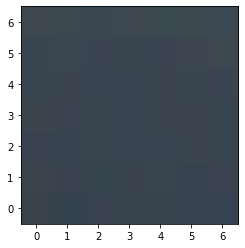

In [277]:
# Display one train image after reordering
image_id = 118
print("ID :", id_train[image_id])
print("Tree cover label :", y_train[image_id,0])
print("All cover labels :", y_train[image_id,:])

rgbArray_r = np.zeros((7,7,3))
rgbArray_r[..., 0] = x_train_r[image_id, bands.index('B4')*no_pixels:(bands.index('B4') + 1)*(no_pixels)].reshape((7,7))
rgbArray_r[..., 1] = x_train_r[image_id, bands.index('B3')*no_pixels:(bands.index('B3') + 1)*(no_pixels)].reshape((7,7))
rgbArray_r[..., 2] = x_train_r[image_id, bands.index('B2')*no_pixels:(bands.index('B2') + 1)*(no_pixels)].reshape((7,7))
rgbArray_r[rgbArray_r > 0.3] = 0.3
rgbArray_r = rgbArray_r / 0.3

rgbArray = np.zeros((7,7,3))
rgbArray[..., 0] = x_train[image_id, bands.index('B4')*no_pixels:(bands.index('B4') + 1)*(no_pixels)].reshape((7,7))
rgbArray[..., 1] = x_train[image_id, bands.index('B3')*no_pixels:(bands.index('B3') + 1)*(no_pixels)].reshape((7,7))
rgbArray[..., 2] = x_train[image_id, bands.index('B2')*no_pixels:(bands.index('B2') + 1)*(no_pixels)].reshape((7,7))
rgbArray[rgbArray > 0.3] = 0.3
rgbArray = rgbArray / 0.3
#print(rgbArray)

images = [rgbArray, rgbArray_r]

for ima in images:
    plt.figure()
    plt.imshow(ima, origin='lower')

In [250]:
## Classify for benchmarking values

no_samples_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000, 10000, 20000, 60000]
accuracies_r = []
confusion_matrices_r = []

clf_r = RandomForestClassifier(random_state=0, n_estimators=10000, bootstrap=False, class_weight='balanced')

for no_samples in no_samples_array:
    print("# of training samples: ", no_samples)
    
    #val_no_samples = min(int(no_samples/3), no_records_validate)
    val_no_samples = no_records_validate
    print("# of validation samples: ", val_no_samples)
    
    clf_r.fit(x_train_r[:no_samples, :],y_train[:no_samples,0]) #first column of y: tree cover label
    y_pred = clf_r.predict(x_validate_r[:val_no_samples,:])

    # evaluate accuracy
    acc_r = clf_r.score(x_validate_r[:val_no_samples,:], y_validate[:val_no_samples,0])
    accuracies_r.append(acc_r)
    print("Accuracy score: ", acc_r)
    
    conf_mat_r = confusion_matrix(y_validate[:val_no_samples,0], y_pred)
    confusion_matrices_r.append(conf_mat_r)
    print("Confusion matrix: \n", conf_mat_r)

# of training samples:  100
# of validation samples:  21097
Accuracy score:  0.6777740911030005
Confusion matrix: 
 [[6958   48    6  156    5    6   89  167   10 1291]
 [ 485    7    1   15    2    0   30   18    2  193]
 [ 299    6    0   10    0    0   14   11    2  146]
 [ 172    1    0    2    0    0   11    7    0  130]
 [ 166    0    0   11    1    1    9   12    0  162]
 [ 110    3    0    6    0    1    9    4    0  145]
 [ 114    3    0    7    0    2    3    3    1  147]
 [ 105    2    0    7    0    1   11    4    0  186]
 [ 204    5    0    7    0    1   11    5    1  373]
 [1248   61    0  174    0    2  101   22   24 7322]]
# of training samples:  200
# of validation samples:  21097
Accuracy score:  0.7147935725458596
Confusion matrix: 
 [[7295    3    2    0    0    5   22    0    2 1407]
 [ 509    2    0    0    0    1    3    0    0  238]
 [ 330    0    0    0    0    1    4    0    0  153]
 [ 189    0    0    0    0    0    3    0    0  131]
 [ 195    0    0    0    

KeyboardInterrupt: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hr/r8bv52hn6sj5ny319b4nfg0h0000gn/T/tmp_7ll7twr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


ValueError: For now, we only support Dense column with rank of 1, but column `B11` got: (7, 7)

In [264]:
print(id_train[118])

['GLU0452795']
